In [2]:
import pandas as pd
import numpy as np
import os
import tqdm 
import logging
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
1. Please modify the categorial variables into dummy variables (e.g., season, weathersit, month, hour, weekday)
2. Normalize continuous variables using z-score (mean=0,sd=1).
3. Exclude the useless features in your training and modeling.
4. Separate the training and validation data. Use the last 21 days’ data for
validation. Note that the target column is “cnt”. The other two “causal” and
“registered” could be overlooked and should not be used as variables in your
code. 

In [3]:
class DataPreProcess(object):
    SourceDataPath='bikeRidershipPredictionDataHour.csv'
    DataSaveFolder='DataPreProcessed'
    # The categorial variables
    CategoryVariables=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
    # The continuous variables
    ContinuousVariables=['temp','atemp','hum','windspeed']
    # The target variable
    TargetVariable='cnt'
    def FileSystemMaker(self):
        # Create the folder for saving the preprocessed data
        if not os.path.exists(self.DataSaveFolder):
            os.makedirs(self.DataSaveFolder)
        if self.IfDummy:
            self.DummyFolder=os.path.join(self.DataSaveFolder,'Dummy')
            if not os.path.exists(self.DummyFolder):
                os.makedirs(self.DummyFolder)
        if self.IfNormalize:
            self.NormalizeFolder=os.path.join(self.DataSaveFolder,'Normalize')
            if not os.path.exists(self.NormalizeFolder):
                os.makedirs(self.NormalizeFolder)
        if self.IfSeparate:
            self.SeparateFolder=os.path.join(self.DataSaveFolder,'Separated')
            if not os.path.exists(self.SeparateFolder):
                os.makedirs(self.SeparateFolder)
    def DummyVariables(self):
        # Create the dummy variables for the categorial variables
        for i in tqdm.tqdm(self.CategoryVariables,desc='Creating Dummy Variables'):
            DummyData=pd.get_dummies(self.RawData[i],drop_first=False, prefix=i)
            DummyResult=pd.concat([self.RawData,DummyData],axis=1)
            # Remove the original categorial variables
            Columns=self.RawData.columns.tolist()
            # Save the dummy variables and the key variable
            Columns.remove('instant')
            DummyResult.drop(Columns,axis=1,inplace=True)
            DummyResult.to_csv(os.path.join(self.DummyFolder,i+'.csv'),index=False)
    def NormalizeVariables(self,target_mean=0,target_sd=1):
        # Normalize the continuous variables
        for i in tqdm.tqdm(self.ContinuousVariables,desc='Normalizing Variables'):
            Mean=self.RawData[i].mean()
            SD=self.RawData[i].std()
            NormalizedData=(self.RawData[i]-Mean)/SD
            NormalizedData=NormalizedData*target_sd+target_mean
            NormalizedData=pd.concat([self.RawData['instant'],NormalizedData],axis=1)
            NormalizedData.to_csv(os.path.join(self.NormalizeFolder,i+'.csv'),index=False)
    def __init__(self,IfCheckInfo=False,IfDummy=True,IfNormalize=True,IfExclude=True,IfSeparate=True):
        # Read the source data
        self.RawData=pd.read_csv(self.SourceDataPath)
        # Check the basic information of the source data
        if IfCheckInfo:
            self.RawData.info()
        # Set the parameters for preprocessing
        self.IfDummy=IfDummy
        self.IfNormalize=IfNormalize
        self.IfExclude=IfExclude
        self.IfSeparate=IfSeparate
        # Create the folder for saving the preprocessed data
        self.FileSystemMaker()
        if self.IfDummy:
            self.DummyVariables()
        if self.IfNormalize:
            self.NormalizeVariables()

In [4]:
# Check the basic information of the source data
RawData=DataPreProcess(IfCheckInfo=True,IfDummy=False,IfNormalize=False,IfExclude=False,IfSeparate=False).RawData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
RawData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


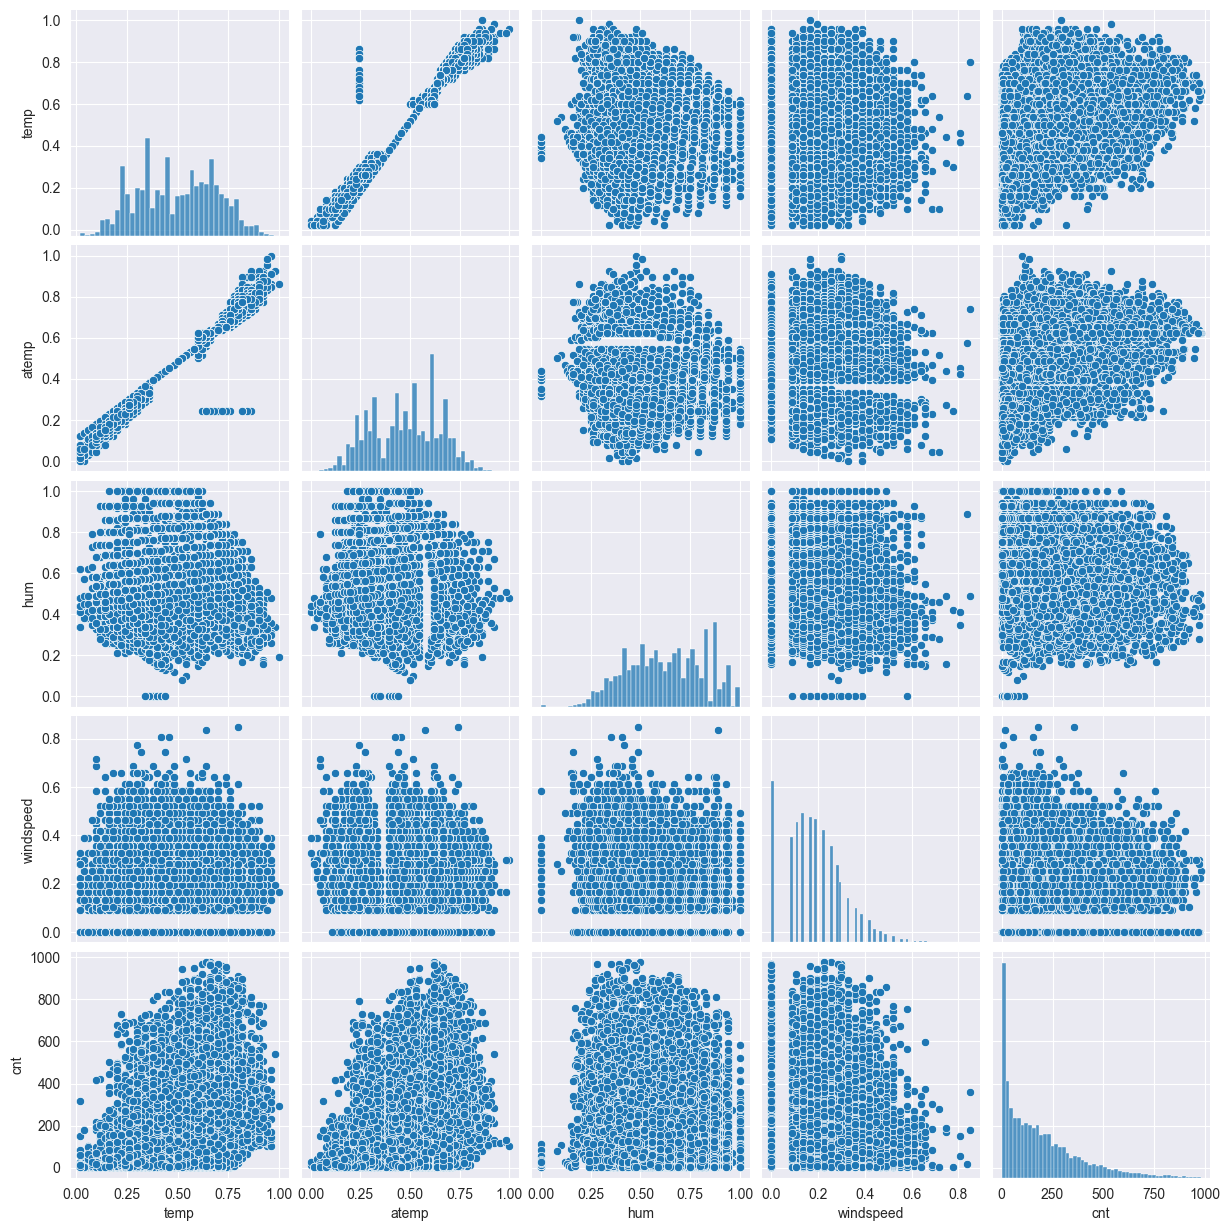

In [8]:
sns.pairplot(RawData[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

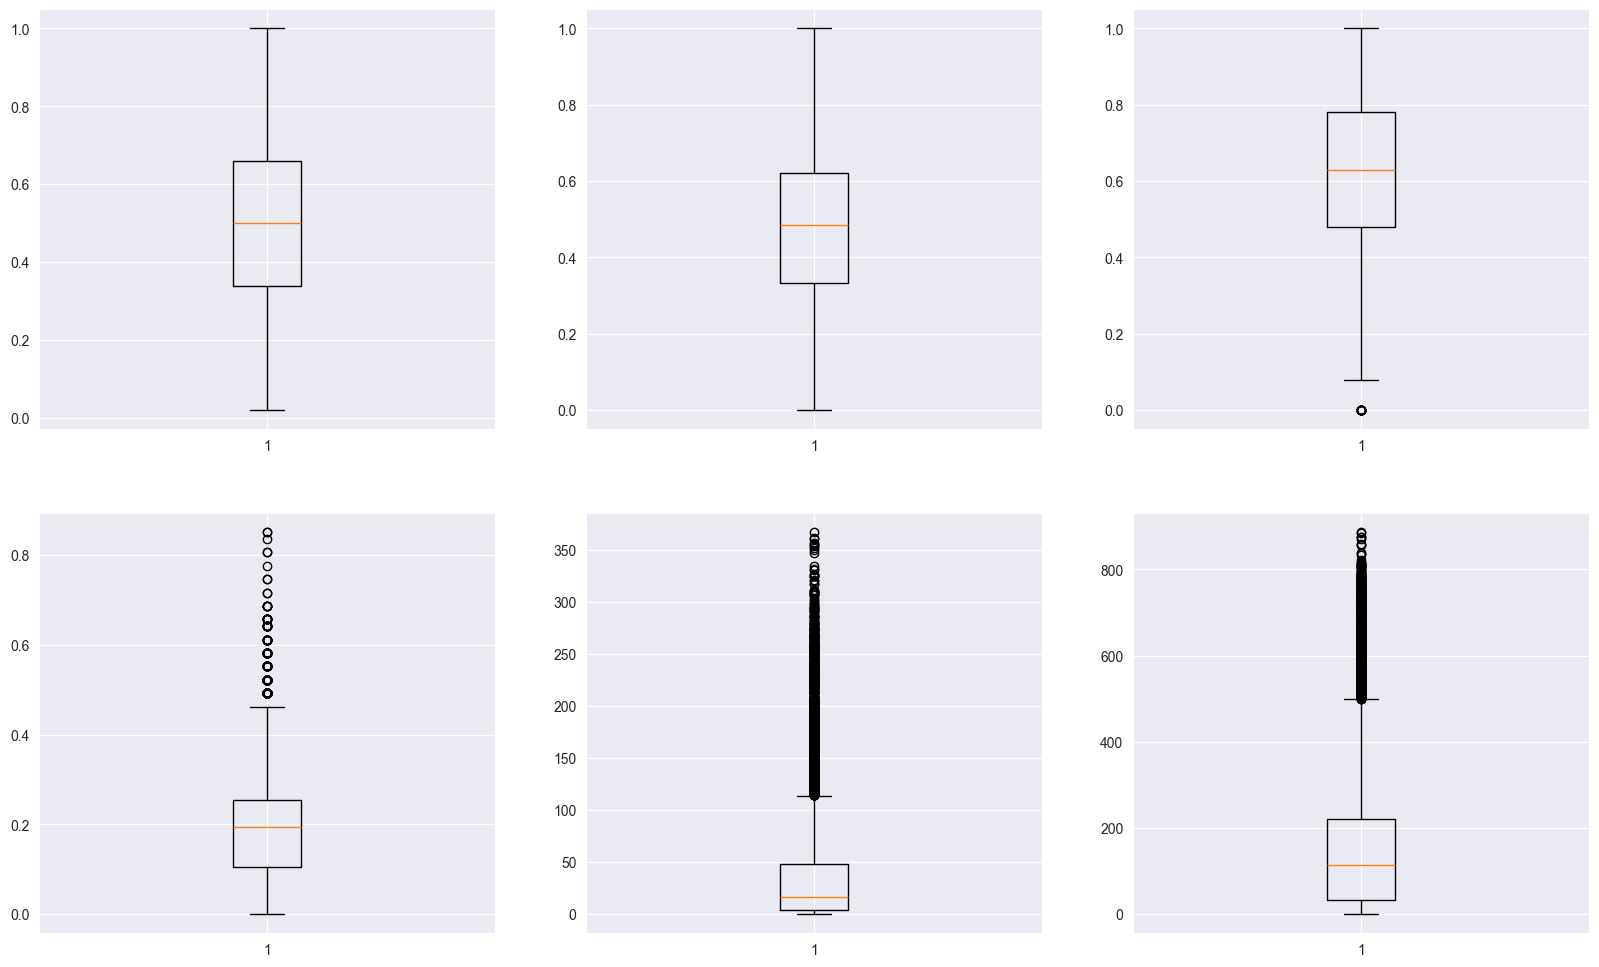

In [7]:
#Plotting box plot of continuous variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.boxplot(RawData["temp"])
plt.subplot(2,3,2)
plt.boxplot(RawData["atemp"])
plt.subplot(2,3,3)
plt.boxplot(RawData["hum"])
plt.subplot(2,3,4)
plt.boxplot(RawData["windspeed"])
plt.subplot(2,3,5)
plt.boxplot(RawData["casual"])
plt.subplot(2,3,6)
plt.boxplot(RawData["registered"])
plt.show()

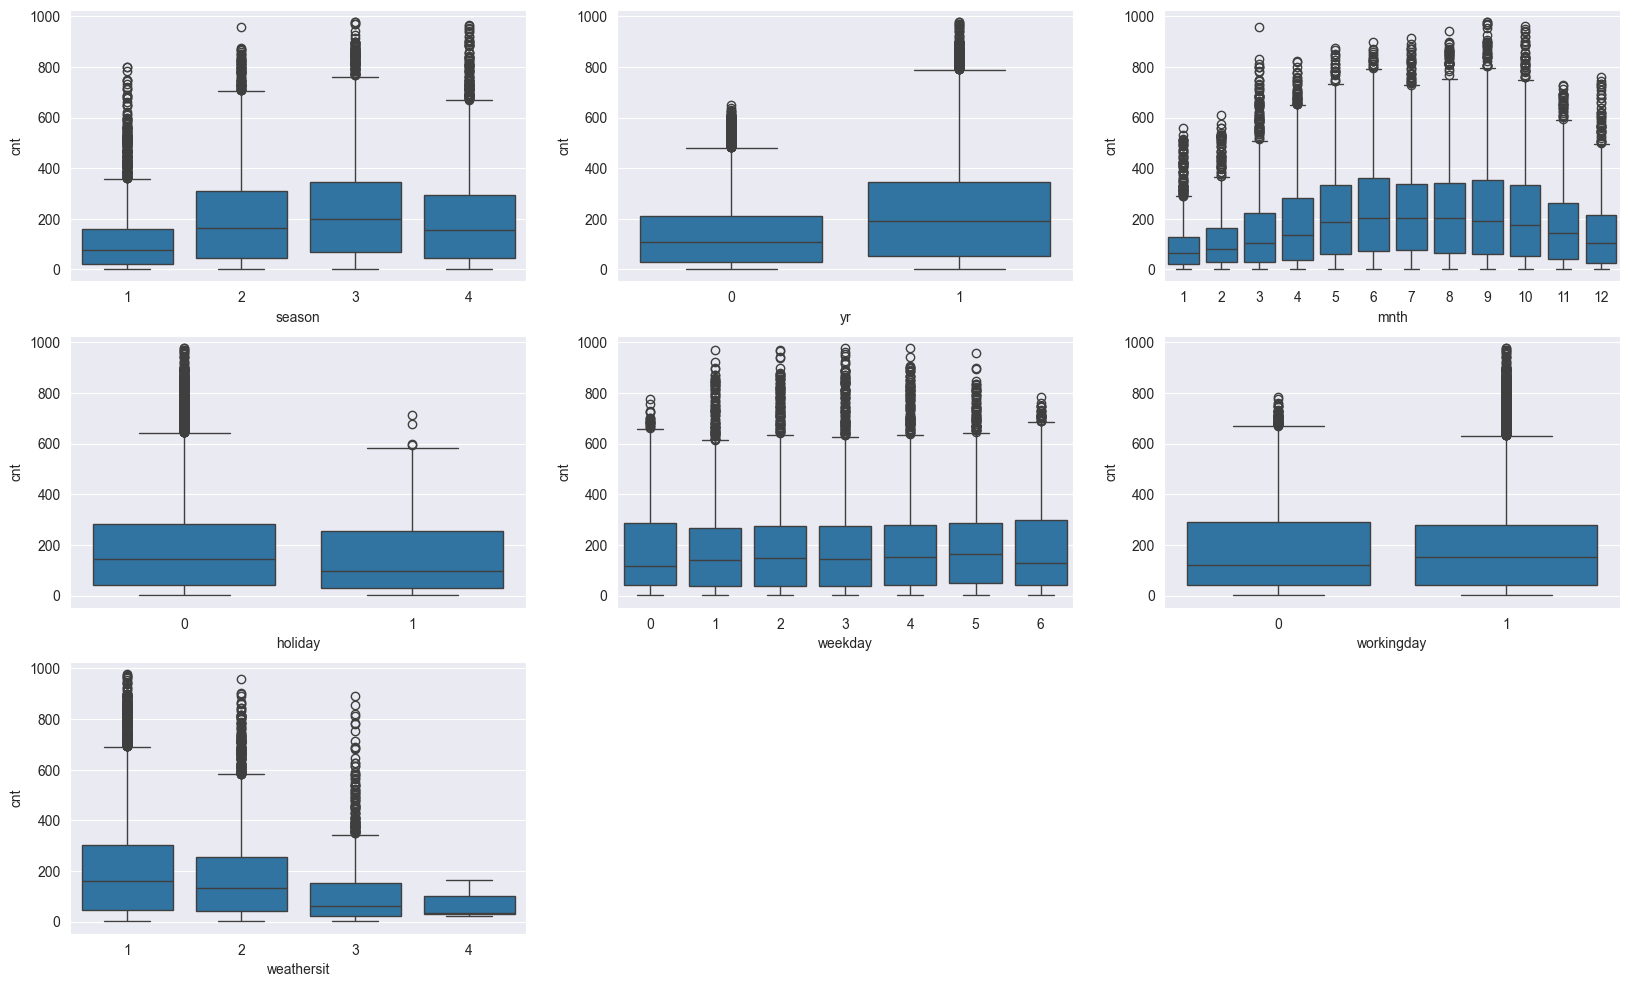

In [9]:
#Plotting box plot of categorical variables
bike_sharing = RawData
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.show()